<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/Learnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing points we learned down the way

**Titanic top 3%** : https://anelmusic13.medium.com/how-to-score-top-3-in-kaggles-titanic-machine-learning-from-disaster-competition-13d056e262b1

## Model used

**Titanic project Models**: RandomForestClassifier or XGBoost or combination of models with voting

## EDA

we can check train and test together from the begining

when a row with such numerical value has no unique value and all the cells are repeated else where then its not true data and more like a copy

## Feature engineering

when we cant understand the data and there is no pattern between them for feature engineering we can summerize and generalize them like having mean std sum and etc and also round them to remove noises

We can somehow think about the model we would like to use in future and do EDA and feature engineering based on that

## Model Interpretation

### Confusion Matrix

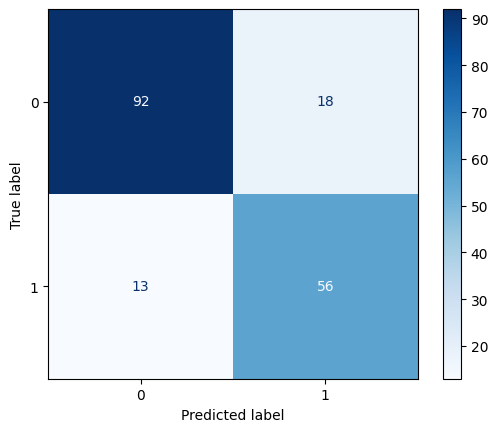

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Train/test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit on training data
voting.fit(X_train, y_train)

# Predict on test data
y_pred = voting.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues");

- **TN** True negatives: 92
- **FP** False positives: 18
- **FN** False negatives: 13
- **TP** True positives: 56

accuracy  0.826

precision 0.7719

recall  0.7776

f1 0.7731


In [ ]:
Accuracy = (92+56)/ (92+56+18+13)
Accuracy

0.8268156424581006

In [ ]:
Precision = 56/(56+18)
Precision

0.7567567567567568

In [ ]:
Recall = 56/(56+13)
Recall

0.8115942028985508

In [ ]:
f1 = 2 * (Precision * Recall) / (Precision + Recall)
f1

0.7832167832167832

Difference between confusion matrix and our vote model above is that we used here one fold and in model training 5 folds

### SHAP (SHapley Additive exPlanations)

- Stands for: SHapley Additive exPlanations

- Based on Shapley values from game theory.

- Idea: Imagine each feature is a “player” in a game of predicting the output. SHAP measures how much each feature contributes to the final prediction.

- ✅ Pros: Consistent, works with many models, very detailed.

- 👉 Example: In a credit score model, SHAP can tell you exactly how much “Age” or “Income” pushed the decision for one customer.

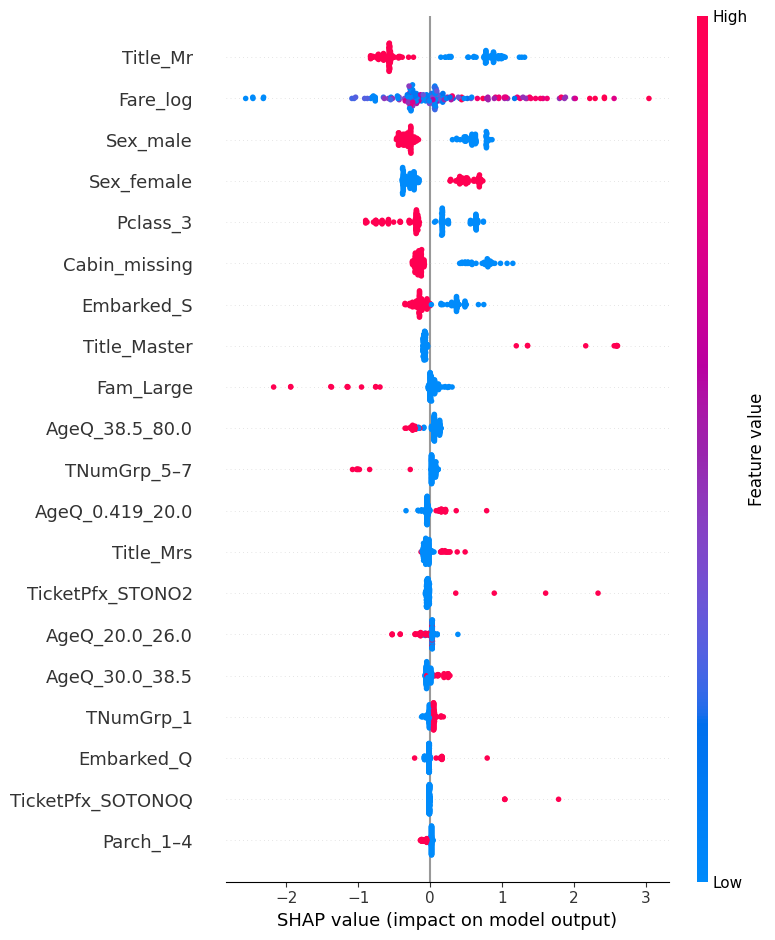

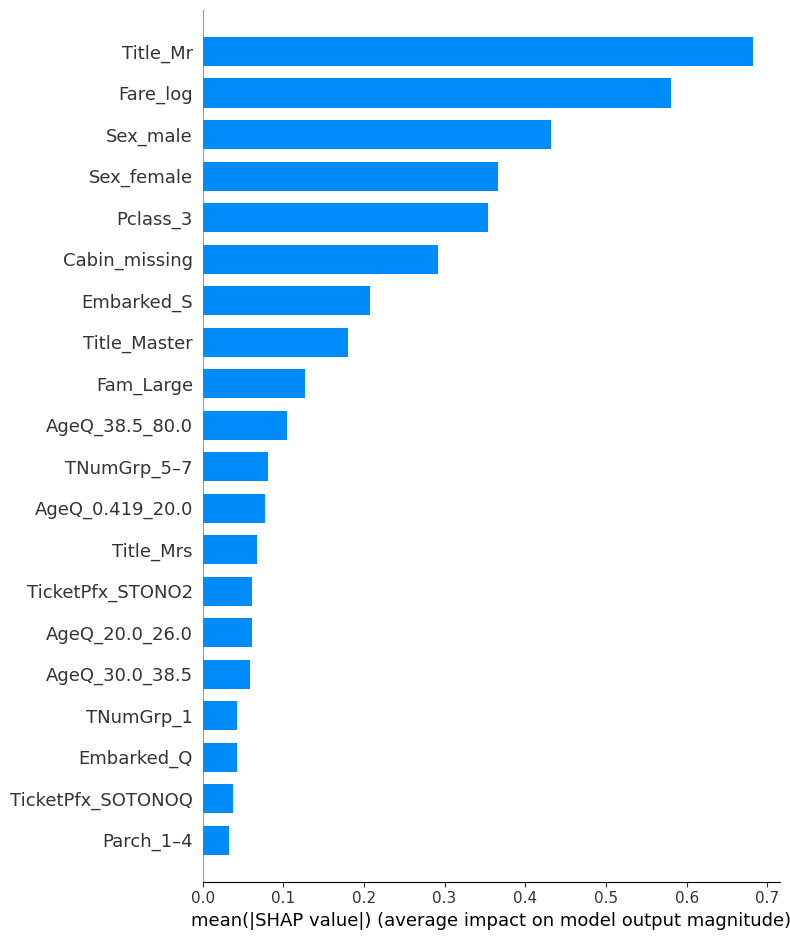

In [ ]:
# pip install shap
import shap

# Use a small background sample for speed
bg = shap.sample(X_train, 100, random_state=42)

# Explain the trained GB inside your voting
gb.fit(X_train, y_train)
expl_gb = shap.TreeExplainer(gb)
shap_values_gb = expl_gb.shap_values(X_val)

# Summary (global importance)
shap.summary_plot(shap_values_gb, X_val, show=True)        # beeswarm
shap.summary_plot(shap_values_gb, X_val, plot_type="bar")  # bar ranking


shap for LogisticRegression

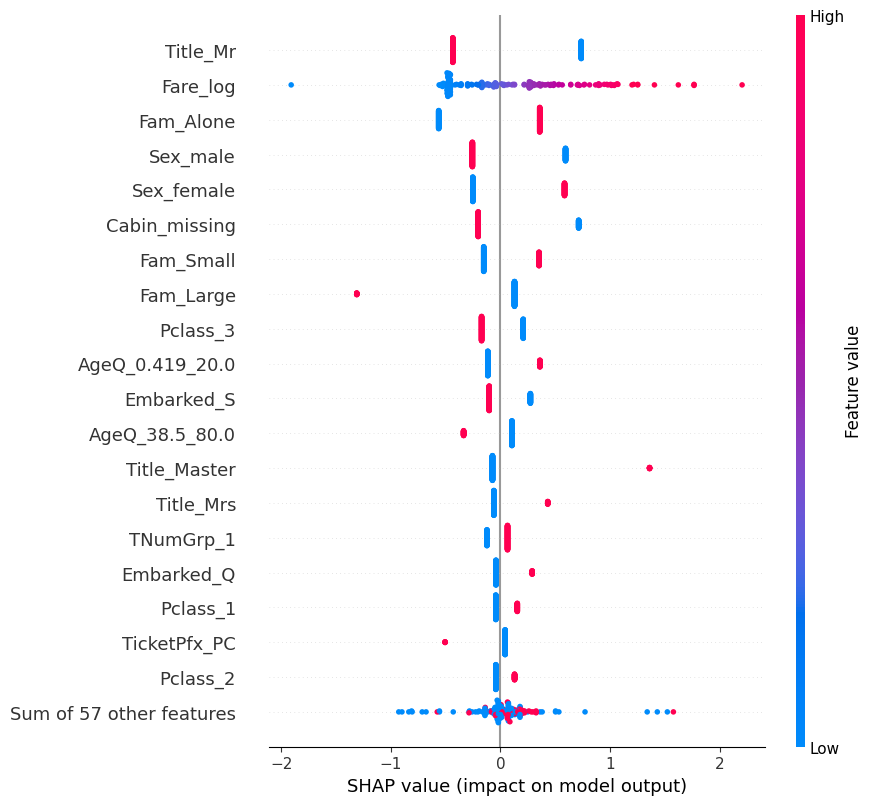

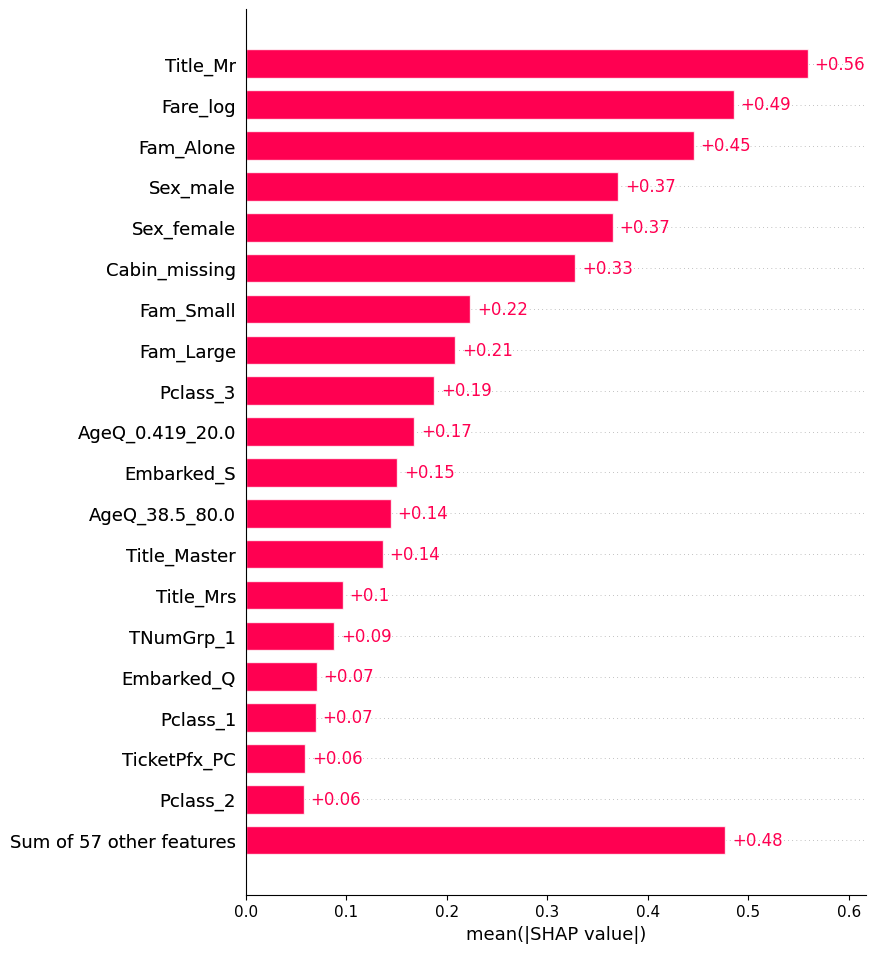

In [ ]:
from scipy import sparse

def to_dense_float64(X):
    if sparse.issparse(X):
        X = X.toarray()
    # keep feature names if you have a DataFrame
    if isinstance(X, pd.DataFrame):
        return X.astype(np.float64)
    return np.asarray(X, dtype=np.float64)

X_train_shap = to_dense_float64(X_train)
X_val_shap  = to_dense_float64(X_val)

# 2) Fit model (already done) and build a small background set
import shap
bg = shap.sample(X_train_shap, 200, random_state=42)

# 3) Use the universal explainer (chooses Linear under the hood)
expl = shap.Explainer(lr, bg)           # model_output='log_odds' is default for linear models
sv = expl(X_val_shap)                  # <- returns a shap.Explanation

# 4) Plots
shap.plots.beeswarm(sv, max_display=20) # summary (beeswarm)
shap.plots.bar(sv, max_display=20)      # global importance

### Lime (Local Interpretable Model-agnostic Explanations)

- Stands for: Local Interpretable Model-agnostic Explanations

- Focuses on explaining one single prediction locally.

- Idea: Around the prediction, LIME builds a simple, interpretable model (like linear regression) to approximate how features affected that decision.

- ✅ Pros: Easy to understand, model-agnostic.

- 👉 Example: LIME can explain why your model predicted “this patient has diabetes” by showing which features mattered most for this patient only.

In [ ]:
!pip -q install lime
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Keep your original X_train (DataFrame) and trained `voting`
feature_names = X_train.columns.tolist()

# LIME wants a numeric matrix for its background
X_train_lime = X_train.values.astype(float)
X_val_lime  = X_val.values.astype(float)

explainer = LimeTabularExplainer(
    X_train_lime,
    feature_names=feature_names,
    class_names=["Not Survived", "Survived"],
    mode="classification",
    discretize_continuous=True,
    random_state=42
)

def predict_proba_df(X_array):
    # Rebuild a DataFrame so sklearn sees feature names it was fitted with
    X_df = pd.DataFrame(X_array, columns=feature_names)
    return voting.predict_proba(X_df)

i = 0
x0 = X_val_lime[i]

exp = explainer.explain_instance(
    x0,
    predict_proba_df,
    num_features=10,
    top_labels=2
)

print("Prediction probabilities:", predict_proba_df([x0])[0])
for feat, weight in exp.as_list(label=exp.available_labels()[1]):
    print(f"{feat}: {weight:+.3f}")

Prediction probabilities: [0.94027422 0.05972578]
TicketPfx_SWPP <= 0.00: -0.325
Title_Master <= 0.00: -0.289
TicketPfx_STONO2 <= 0.00: -0.244
0.00 < Title_Mr <= 1.00: -0.228
Title_Rev <= 0.00: +0.181
TicketPfx_SOPP <= 0.00: +0.149
TicketPfx_SOTONOQ <= 0.00: -0.147
0.00 < Sex_male <= 1.00: -0.131
Sex_female <= 0.00: -0.123
TicketPfx_WC <= 0.00: +0.116


## Feature importance

### PFI (Permutation Feature Importance)

- Stands for: Permutation Feature Importance

- Idea: To see how important a feature is, shuffle its values and check how much the model’s accuracy drops.

- ✅ Pros: Simple, global measure of feature importance.

- 👉 Example: If shuffling “income” makes your salary prediction model much worse, then income is very important.

In [ ]:
from sklearn.inspection import permutation_importance

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

voting.fit(X_train, y_train)

perm = permutation_importance(
    voting, X_val, y_val, n_repeats=20, random_state=42, n_jobs=-1, scoring="f1"
)

pi_df = pd.DataFrame({
    "feature": X_val.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print(pi_df.head(50))

                feature  importance_mean  importance_std
11         Title_Master         0.051646        0.009593
15             Title_Mr         0.040137        0.020771
70             Fare_log         0.034806        0.018408
35            Fam_Large         0.021554        0.008059
21             Sex_male         0.018698        0.021033
20           Sex_female         0.017478        0.018468
63       TicketPfx_SWPP         0.010263        0.004928
33            Fam_Alone         0.010092        0.008371
26       AgeQ_38.5_80.0         0.006006        0.006736
22      AgeQ_0.419_20.0         0.005685        0.004346
75           Embarked_S         0.005416        0.008748
2              Pclass_3         0.004418        0.006093
12           Title_Miss         0.004079        0.002355
74           Embarked_Q         0.003102        0.004670
67            TNumGrp_1         0.002991        0.002706
62     TicketPfx_STONO2         0.002370        0.005864
25       AgeQ_30.0_38.5        

### Slice analysis

#### Fairlearn

🍰 What is **Slice Analysis**?

* Slice analysis = checking how your model performs **on different subgroups (slices) of the data**, instead of just overall.
* A model may look good on average, but could be **biased or unfair** for certain groups.

👉 Example:

* Suppose your model predicts **loan approvals**.
* Overall accuracy = 90%. Looks great!
* But when you slice the data:

  * Accuracy for men = 92%
  * Accuracy for women = 78%
  * Accuracy for seniors = 60%

This shows hidden bias you wouldn’t see from the overall score.

---

⚖️ **Fairlearn & Slice Analysis**

* **Fairlearn** is a Python library for fairness in ML.
* It lets you measure performance metrics (accuracy, precision, recall, error rate, etc.) **across different slices of data**, like gender, race, or age groups.
* This is called **fairness evaluation**.

---

📝 Why it matters

* Slice analysis helps you **find hidden weaknesses** in your model.
* Critical for fairness, ethics, and trust → especially in sensitive fields (finance, healthcare, hiring).

---

✅ So:

* **Slice analysis** = “zooming into subgroups” to check fairness and performance.
* **Fairlearn** = library that makes this analysis (and fairness mitigation) easier.


In [9]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.6 MB/s eta 0:00:00


In [11]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
import pandas as pd

# Example data
y_true = [1,0,1,1,0,0,1,0]   # actual labels
y_pred = [1,0,1,0,0,1,1,0]   # model predictions
gender = ['M','M','F','F','M','F','F','M']  # subgroup attribute

# Slice analysis: accuracy per gender
frame = MetricFrame(metrics=accuracy_score,
                    y_true=y_true,
                    y_pred=y_pred,
                    sensitive_features=gender)

print("Overall accuracy:", frame.overall)
print("Accuracy by group:\n", frame.by_group)


Overall accuracy: 0.75
Accuracy by group:
 sensitive_feature_0
F    0.5
M    1.0
Name: accuracy_score, dtype: float64


## Project management, GIT for ML

#### MLflow

🔎 What is **MLflow**?

* **MLflow** is an **open-source tool** to manage the *lifecycle of machine learning projects*.
* It helps you keep track of experiments, share them, and move models from research → production.

---

🧩 What does MLflow do?

It has **4 main parts**:

1. **Tracking**

   * Logs experiments (parameters, metrics, code, results).
   * Example: You try 3 models with different learning rates → MLflow records which one performed best.

2. **Projects**

   * Standardizes how you package and run ML code.
   * Makes your project reproducible by others.

3. **Models**

   * Manages and stores trained models.
   * Lets you serve models with different frameworks (TensorFlow, PyTorch, Scikit-learn, etc.).

4. **Registry**

   * A central place to version, approve, and deploy models.
   * Example: “This is version 2 of our fraud detection model, approved for production.”

---

👉 This saves your experiment in MLflow → you can open the UI and see:

* Params (n\_estimators=50)
* Metric (accuracy=0.97)
* The trained model

---

📝 Why it matters

* Without MLflow, ML projects get messy (lots of notebooks, random models, hard to reproduce results).
* With MLflow, you have an **organized log of what was tried, what worked, and which model to deploy**.

---

✅ In short:
MLflow = **GitHub for ML experiments + Deployment manager**.

In [13]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 10.7 MB/s eta 0:00:00


In [22]:
# =========================
# Full MLflow + sklearn demo (with results shown inline)
# =========================

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import os, json
import pandas as pd

# Use local store
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("iris-rf-demo")

# ---- Data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---- Model + hyperparams
params = {"n_estimators": 120, "max_depth": 5, "random_state": 42}
model = RandomForestClassifier(**params)

with mlflow.start_run(run_name="rf-iris") as run:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")

    mlflow.log_params(params)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_macro", f1_macro)

    # Save artifact
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    os.makedirs("artifacts", exist_ok=True)
    with open("artifacts/classification_report.json", "w") as f:
        json.dump(report, f, indent=2)
    mlflow.log_artifact("artifacts/classification_report.json")

    # Log model
    input_example = X_train[:1]
    signature = infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(
        sk_model=model,
        name="random_forest_iris",
        input_example=input_example,
        signature=signature
    )

    print(f"Accuracy: {acc:.4f} | F1-macro: {f1_macro:.4f}")

# ---- Show results directly ----
client = MlflowClient()
exp = mlflow.get_experiment_by_name("iris-rf-demo")
runs = mlflow.search_runs([exp.experiment_id], order_by=["start_time DESC"])

# Display last run nicely
pd.set_option("display.max_columns", None)
print("\nLatest Run Details:\n")
display(runs.head(1)[[
    "run_id", "status", "params.n_estimators", "params.max_depth",
    "metrics.accuracy", "metrics.f1_macro", "start_time", "end_time"
]])

# Load and show classification report artifact
with open("artifacts/classification_report.json") as f:
    report_data = json.load(f)

print("\nClassification Report (from artifact):\n")
print(json.dumps(report_data, indent=2))


Accuracy: 0.9211 | F1-macro: 0.9230

Latest Run Details:



,run_id,status,params.n_estimators,params.max_depth,metrics.accuracy,metrics.f1_macro,start_time,end_time
0,bd9f0e494c2c4df18734f8995e6701d1,FINISHED,120,5,0.921053,0.922963,2025-09-09 08:36:56.746000+00:00,2025-09-09 08:37:05.075000+00:00



Classification Report (from artifact):

{
  "setosa": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 12.0
  },
  "versicolor": {
    "precision": 0.8571428571428571,
    "recall": 0.9230769230769231,
    "f1-score": 0.8888888888888888,
    "support": 13.0
  },
  "virginica": {
    "precision": 0.9166666666666666,
    "recall": 0.8461538461538461,
    "f1-score": 0.88,
    "support": 13.0
  },
  "accuracy": 0.9210526315789473,
  "macro avg": {
    "precision": 0.9246031746031745,
    "recall": 0.923076923076923,
    "f1-score": 0.9229629629629629,
    "support": 38.0
  },
  "weighted avg": {
    "precision": 0.9226190476190477,
    "recall": 0.9210526315789473,
    "f1-score": 0.9209356725146198,
    "support": 38.0
  }
}


## Imbalance data

### undersampling

1️⃣ **Undersampling (Majority Downsampling)**

🔎 What it is

* When one class has **much more data** (majority), we randomly remove some of those samples.
* This balances the dataset, but at the cost of **throwing away information**.

👉 Example: Fraud detection

* 98% = Non-fraud
* 2% = Fraud
* Undersampling means taking only a small random chunk of the 98% so that fraud vs non-fraud is closer to balanced.


✅ Pros: Quick, balances data.
❌ Cons: Loses lots of majority info.

In [23]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=5, weights=[0.9, 0.1], random_state=42)
print("Before undersampling:", Counter(y))

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print("After undersampling:", Counter(y_res))


Before undersampling: Counter({np.int64(0): 895, np.int64(1): 105})
After undersampling: Counter({np.int64(0): 105, np.int64(1): 105})


### oversampling

2️⃣ **Oversampling (Minority Upsampling)**

🔎 What it is

* Instead of cutting the majority, we **duplicate minority samples** until classes are balanced.
* Keeps all majority data, but can cause **overfitting** (model memorizes duplicates).

👉 Example: Same fraud case → instead of removing non-fraud, we copy fraud samples until numbers are closer.


✅ Pros: Keeps all data.
❌ Cons: Risk of overfitting since minority samples are repeated.

In [24]:
from imblearn.over_sampling import RandomOverSampler

# Original imbalance
print("Before oversampling:", Counter(y))

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print("After oversampling:", Counter(y_res))


Before oversampling: Counter({np.int64(0): 895, np.int64(1): 105})
After oversampling: Counter({np.int64(0): 895, np.int64(1): 895})


### SMOTE (Synthetic Minority Over-sampling TEchnique)

3️⃣ **SMOTE (Synthetic Minority Over-sampling Technique)**

🔎 What it is

* Instead of **copying** minority samples, SMOTE creates **synthetic new ones**.
* It looks at nearest neighbors in minority class, and creates points **in-between** them.
* This way, the minority class gets more variety, not just duplicates.

👉 Example: Fraud case → instead of cloning existing fraud samples, SMOTE generates new “fraud-like” examples by interpolation.


✅ Pros: More realistic balance, less overfitting than oversample.
❌ Cons: Can create noisy points, doesn’t work well with categorical data.


In [25]:
from imblearn.over_sampling import SMOTE

# Original imbalance
print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({np.int64(0): 895, np.int64(1): 105})
After SMOTE: Counter({np.int64(0): 895, np.int64(1): 895})




| Method          | How it works               | Pros                 | Cons                      |
| --------------- | -------------------------- | -------------------- | ------------------------- |
| **Undersample** | Remove majority samples    | Fast, avoids overfit | Lose information          |
| **Oversample**  | Duplicate minority samples | Keep all data        | Overfit risk              |
| **SMOTE**       | Create synthetic minority  | More variety         | Noise, categorical issues |


## Visualizations

### Swarm plot

What’s a **swarm plot**?

A **swarm plot** (aka *beeswarm*) shows **every individual data point** for a numeric variable across **categories**, while smartly **avoiding overlap**.

* X (or Y): category (e.g., day of week)
* Y (or X): numeric values (e.g., tip amount)
* Points are packed so you can see the **full distribution** without points sitting on top of each other.

🧭 When to use it

* You want **all data points visible** (small–medium datasets).
* You need to compare **distributions across categories** (and maybe by a subgroup with color).
* Great alternative to jittered scatter; clearer than box/violin when the sample is small.

**Avoid** for huge datasets (gets slow/cluttered) → consider `violinplot`/`boxplot` or downsampling.


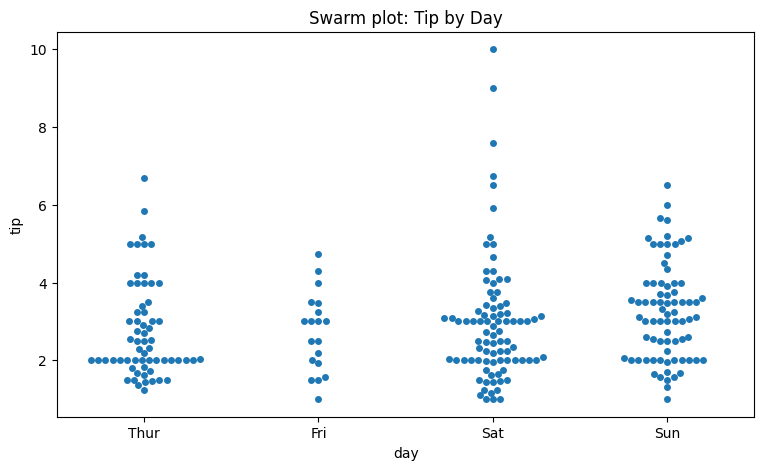

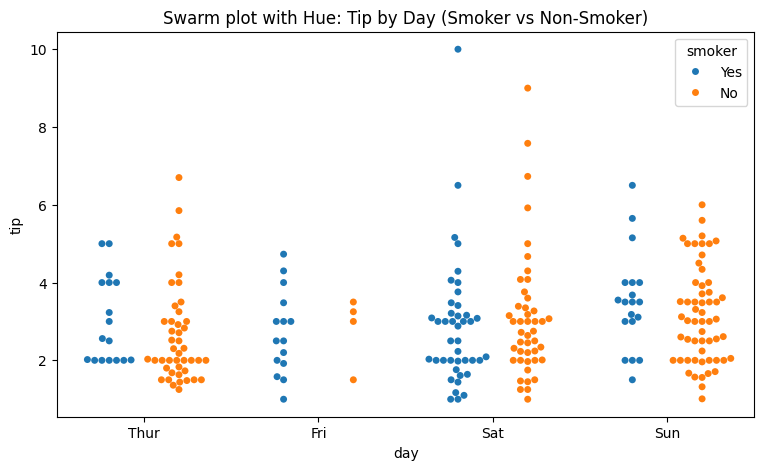

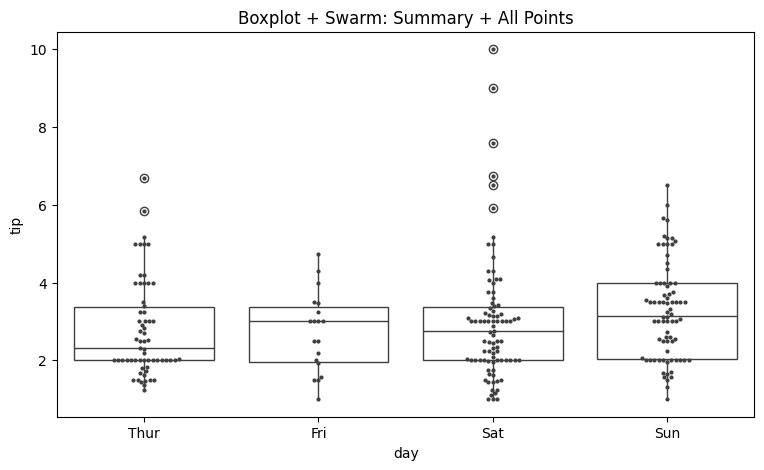

In [2]:
# Swarm plot basics in Colab

import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with a categorical column and a numeric column
tips = sns.load_dataset("tips")  # columns: total_bill, tip, sex, smoker, day, time, size

# 1) Simple swarm: tip distribution by day
plt.figure(figsize=(9, 5))
sns.swarmplot(data=tips, x="day", y="tip")
plt.title("Swarm plot: Tip by Day")
plt.show()

# 2) Add hue (subgroups) and dodge to separate categories within each day
plt.figure(figsize=(9, 5))
sns.swarmplot(data=tips, x="day", y="tip", hue="smoker", dodge=True) #hue="group" + dodge=True separates subgroups side-by-side.
plt.title("Swarm plot with Hue: Tip by Day (Smoker vs Non-Smoker)")
plt.show()

# 3) Overlay a boxplot for summary + swarm for raw points (nice combo)
plt.figure(figsize=(9, 5))
sns.boxplot(data=tips, x="day", y="tip", whis=1.5, showcaps=False, boxprops={'facecolor':'none'})
sns.swarmplot(data=tips, x="day", y="tip", color="0.25", size=3)
plt.title("Boxplot + Swarm: Summary + All Points")
plt.show()


### missing values plot

🧩 What is a **missing values plot**?

* It’s a **visual map** that shows **which cells in your dataset are missing (NaN/null)**.
* Each column = a feature, each row = a data record.
* Colored squares = present values, white gaps = missing values.

👉 It helps you quickly see:

* Which columns have missing data.
* How much data is missing.
* If missingness has a pattern (e.g., entire rows missing in some features).


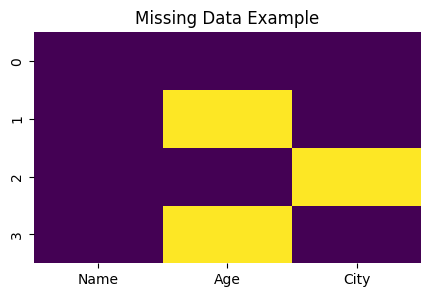

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with missing values
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, None, 30, None],
    "City": ["NY", "LA", None, "SF"]
}
df = pd.DataFrame(data)

# Function to plot missing data
def plot_missing_data(dataset, title):
    plt.figure(figsize=(5,3))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar=False, cmap="viridis")
    plt.show()

plot_missing_data(df, "Missing Data Example")


### distributaion plot

📊 What is a **distribution plot**?

* A **distribution plot** shows how the values of a variable are **spread out** (distributed).
* It tells you things like:

  * Is the data centered around a value?
  * Is it symmetric or skewed?
  * Are there outliers?
  * Does it look like a normal (bell curve) distribution?

---

🧭 When do we use it?

* To **understand the shape** of a feature (numeric column).
* Before training a model → helps you see if data is skewed, has outliers, etc.
* Example: distribution of **Age** in Titanic dataset → Are passengers mostly young? Are there many old passengers?


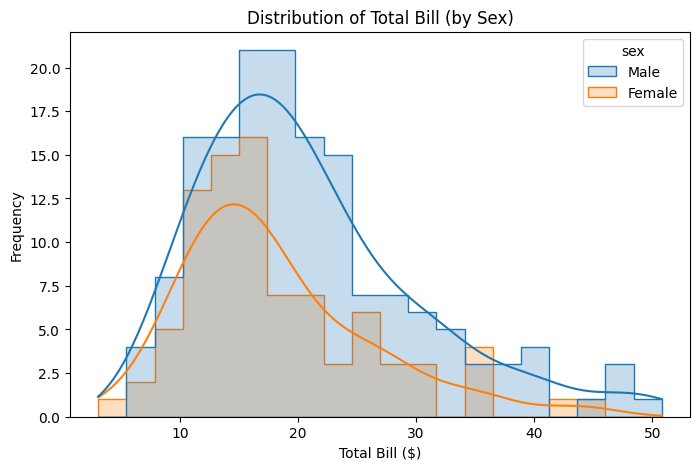

In [6]:
# Load tips dataset
tips = sns.load_dataset("tips")

# Distribution of total_bill split by gender
plt.figure(figsize=(8,5))
sns.histplot(data=tips, x="total_bill", hue="sex", bins=20, kde=True, element="step")
plt.title("Distribution of Total Bill (by Sex)")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.show()


#### why normal distribution matters

1️⃣ Why does it matter if it’s a **bell shape** (normal distribution) and not a rectangle?

* A **bell curve** (normal distribution) means most values are around the average, and fewer are very low or very high.
* Many **statistical tests and machine learning models assume bell-shaped data** → they work better when the data is normal.
* If data were a **rectangle** (uniform), every value is equally likely → that’s unusual in real life (e.g., not everyone has the same chance of being 1 year old, 50 years old, or 90 years old).

👉 Example: Heights of people form a bell curve (most people are medium height, few are very short/tall). If it were a rectangle, it would mean babies and basketball players are equally common — not realistic.

---

2️⃣ Why does **skewness** matter?

* **Skewed data** means the “center” is pulled to one side.
* This affects:

  * **Mean vs Median** (they’re different if data is skewed).
  * **Model performance** (linear regression can give bad predictions if residuals are skewed).
  * **Business interpretation**: If income is right-skewed, the average salary looks high, but most people actually earn less than that.

👉 Example: House prices → a few million-dollar homes make the average look huge, but most houses are cheaper.

---

3️⃣ What if the **peak is at 0**?

* That means most of the data points are close to 0.
* Sometimes that’s okay (e.g., most customers spend \$0 on luxury items).
* But sometimes it shows **sparsity** (lots of zeros) → which tells you something important.

👉 Example: In credit card fraud detection, most transactions = 0 fraud. Only a few = fraud. That “peak at 0” is crucial information.

---

4️⃣ So… why does all this matter?

Because the **shape of the distribution tells the story of your data**.

* Bell shape = data is balanced, predictable.
* Skewed shape = some extreme values/outliers dominate.
* Peak at 0 = most events didn’t happen, rare events matter.

If you ignore it → you might use the wrong model, make wrong assumptions, or mislead your conclusions.


#### why standard distribution matters

🔹 Normal vs. Standard Normal

* **Normal distribution**: bell-shaped, centered at the mean (could be 50, 100, anything), with some spread (std).
* **Standard normal distribution**: a special case where

  * Mean = **0**
  * Standard deviation = **1**

👉 You can always convert a normal distribution into standard normal using **z-scores**:

$$
z = \frac{x - \mu}{\sigma}
$$

This rescales values relative to the mean and std.

---

🔹 Why does standardizing (mean=0, std=1) matter?

1. **Fair comparison between features**

   * Example: One feature = Age (0–90), another = Salary (0–100,000).
   * If you don’t scale, models think Salary is way more important just because of its big numbers.
   * Standardizing makes both centered at 0, so the model treats them fairly.

2. **Mathematical convenience**

   * Many formulas, probability tables, and statistical tests assume standard normal.
   * For example, when we calculate probabilities (like “what % of students score above X”), we use the standard normal curve.

3. **Improved model training**

   * Gradient descent (used in ML models) converges faster when features are scaled to mean 0, std 1.
   * Without it, some weights take giant steps, others tiny steps → training becomes unstable.

---

🔹 Simple example

Imagine you’re training a model with 2 features:

* `height` in cm (around 150–200)
* `weight` in kg (around 50–100)

Without scaling: model thinks height is more important, because numbers are bigger.
With standardization: both features become mean=0, std=1 → model can focus on **relationships, not raw scale**.

---

✅ So:

* **Normal** shape matters → tells us if data is symmetric, skewed, or extreme.
* **Standard normal (mean=0, std=1)** matters → makes math easier, comparisons fair, and training faster.


### Kernel density plot


📊 What is **Kernel Density Estimation (KDE)?**

* KDE is a way to **estimate the shape of a distribution** (the “curve”) based on the data you have.
* Instead of showing bars (like a histogram), KDE draws a **smooth curve** that represents where data points are concentrated.

---

🧩 How does it work (in plain words)?

1. Take each data point.
2. Place a little “bump” (kernel) centered at that point.

   * The bump is usually shaped like a bell (Gaussian).
3. Add up all those bumps.
4. The result = a smooth curve showing where the data lives.

👉 This curve = the **KDE plot**.

---

🎯 Why do we use it?

>Histograms depend on bin size (bars can look very different if you change bins).
* KDE is **smoother and easier to read**.
* Helps see if data is **unimodal (one peak)**, **bimodal (two peaks)**, skewed, etc.

---
📝 Summary

* **KDE = smooth version of histogram**.
* Built by stacking small “bumps” (kernels) over each data point.
* Helps visualize the **underlying probability distribution** of data.



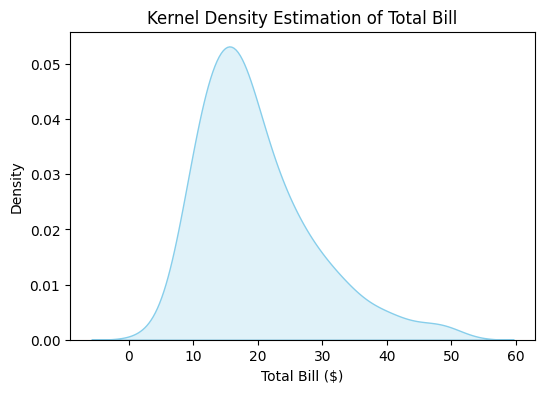

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset
tips = sns.load_dataset("tips")

# KDE plot of total bill amounts
plt.figure(figsize=(6,4))
sns.kdeplot(data=tips, x="total_bill", fill=True, color="skyblue")
plt.title("Kernel Density Estimation of Total Bill")
plt.xlabel("Total Bill ($)")
plt.show()


## remove redundant features

if we have sex age and then title which also title shows the range of age and sex then age and sex can be removed and we can simply use our title feature

1. **Sign up for ngrok:** If you don't have an account, sign up at [https://dashboard.ngrok.com/signup](https://dashboard.ngrok.com/signup).
2. **Get your authtoken:** After signing up and verifying your email, go to the "Your Authtoken" page on the ngrok dashboard: [https://dashboard.ngrok.com/get-started/your-authtoken](https://dashboard.ngrok.com/get-started/your-authtoken).
3. **Add your authtoken to Colab secrets:**
    - Click on the "🔑" icon in the left sidebar of your Colab notebook.
    - Click on "Add new Secret".
    - For the **Name**, enter `NGROK_AUTH_TOKEN`.
    - For the **Value**, paste your authtoken from the ngrok dashboard.
    - Make sure the "Notebook access" toggle is enabled for this notebook.
4. **Add code to load the authtoken:** In a code cell, add the following code to load the authtoken from secrets and configure ngrok: